**1. Loading and Cleaning the Dataset**

In [8]:
# Importing necessary libraries for machine learning workflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Displaying basic information about the dataset
data_info = data.info()
data_head = data.head()

# Checking for missing values
missing_values = data.isnull().sum()

# Summary statistics for numerical features
data_describe = data.describe()

data_info, data_head, missing_values, data_describe


# Initialize label encoder and standard scaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Encode the target variable (categorical to numerical)
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])

# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Exclude the encoded target variable from numerical columns
if 'Target_encoded' in numerical_columns:
    numerical_columns.remove('Target_encoded')

# Encode categorical columns to numeric
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Combine all numeric columns
all_numeric_columns = numerical_columns + categorical_columns

# Standardize numerical features
data[all_numeric_columns] = scaler.fit_transform(data[all_numeric_columns])

# Display processed data head and encoded classes
processed_data_head = data.head()
encoded_classes = label_encoder.classes_

print("Processed Data (First 5 Rows):")
print(processed_data_head)
print("\nEncoded Classes:")
print(encoded_classes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

**2. Exploratory Data Analysis (EDA)**

C:\Windows\Temp\ipykernel_23048\1389938776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Target_encoded'], palette='viridis')


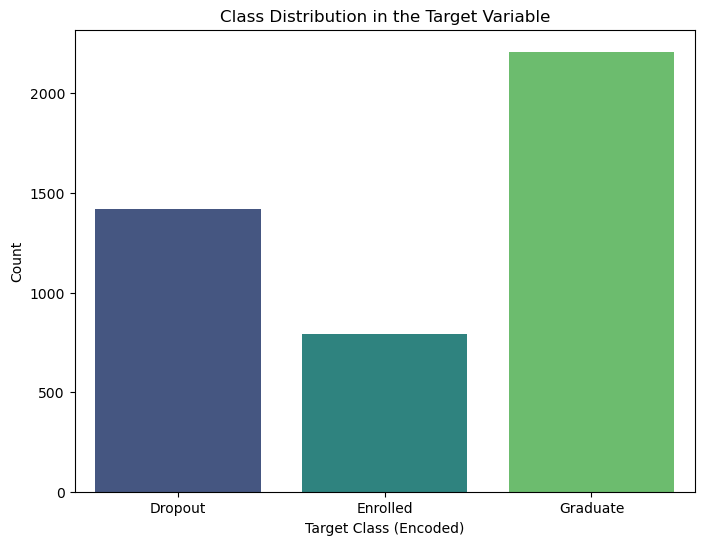

C:\Users\CG USER\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\CG USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


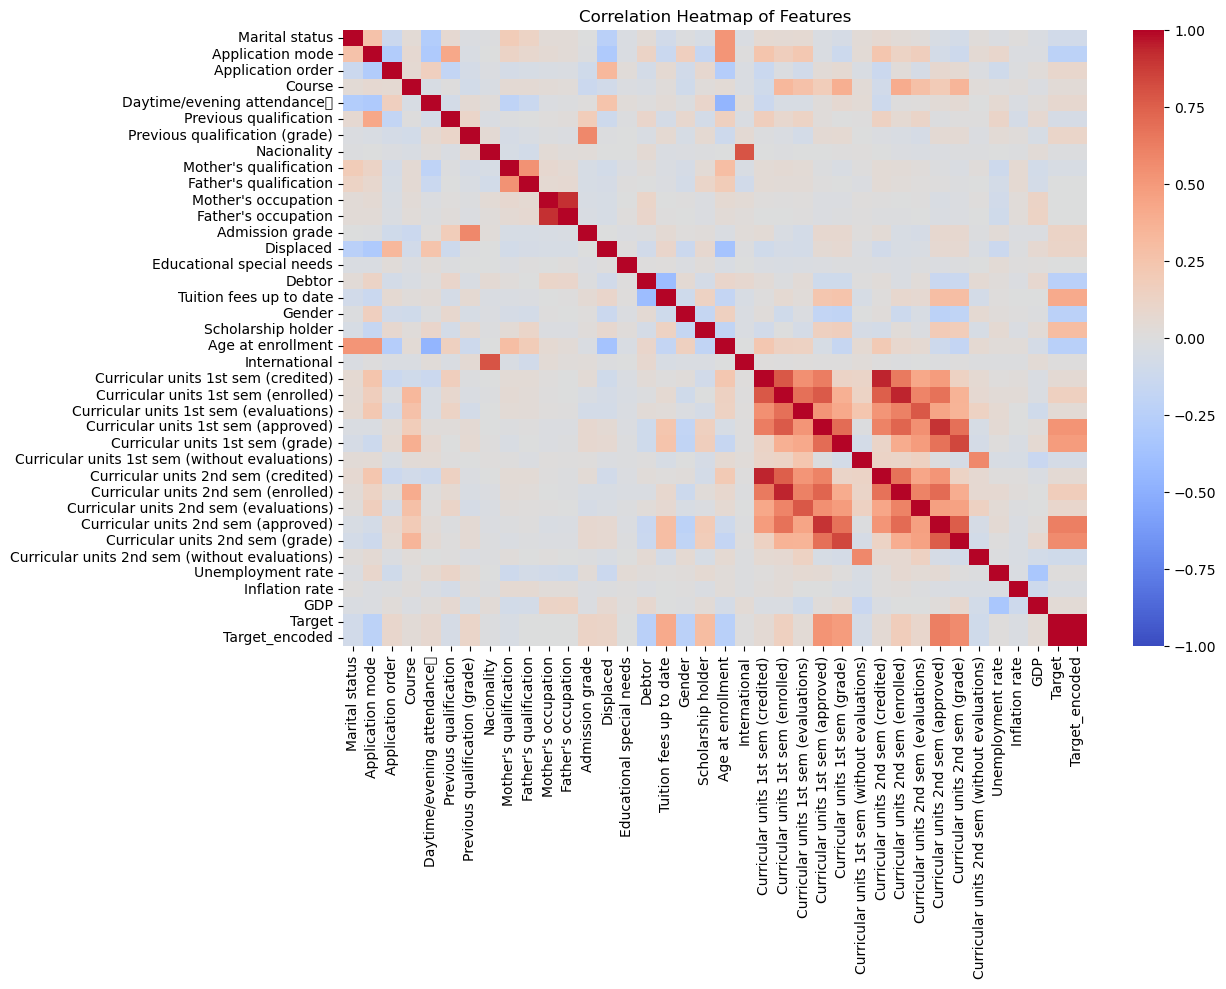

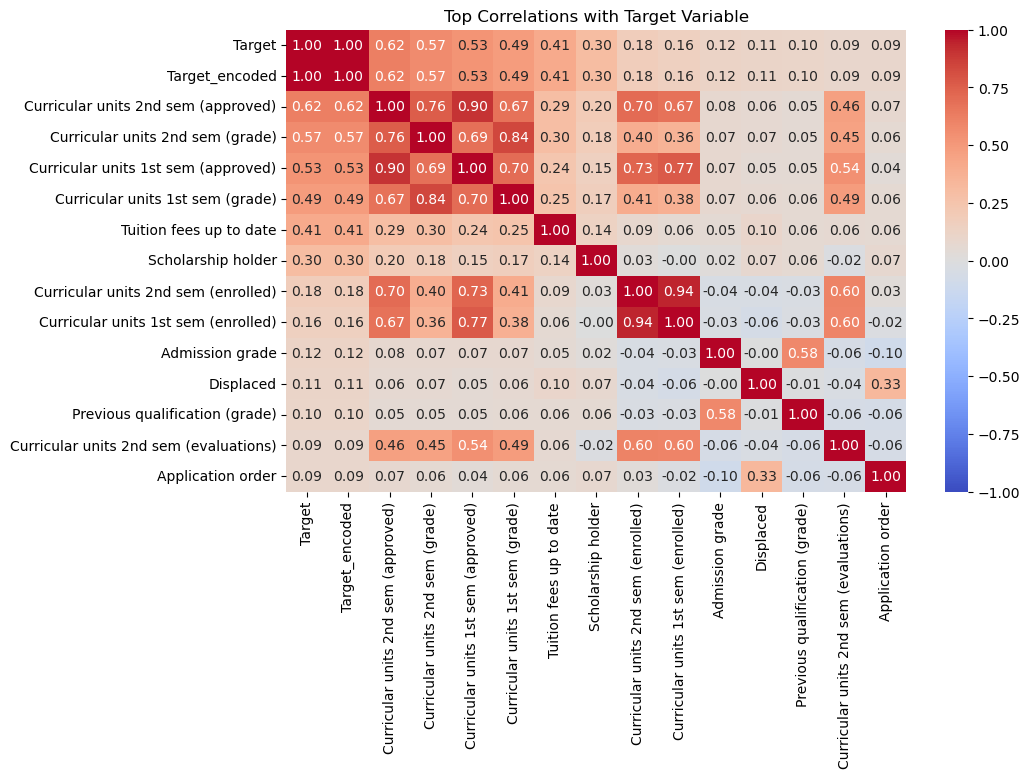

Top Features Correlated with Target:
Target                                            1.000000
Target_encoded                                    1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance\t                      0.075107
Curricular units 2n

In [9]:
# Visualize the class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Target_encoded'], palette='viridis')
plt.title("Class Distribution in the Target Variable")
plt.xlabel("Target Class (Encoded)")
plt.ylabel("Count")
plt.xticks(ticks=range(len(encoded_classes)), labels=encoded_classes)
plt.show()

# Compute the correlation matrix for all features
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

# Extract correlations of each feature with the target variable
target_correlation = correlation_matrix['Target_encoded'].sort_values(ascending=False)

# Visualize the top correlations with the target variable
top_correlated_features = target_correlation.head(15).index  # Top 15 features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.loc[top_correlated_features, top_correlated_features],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Top Correlations with Target Variable")
plt.show()

# Print the target correlations
print("Top Features Correlated with Target:")
print(target_correlation)



C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


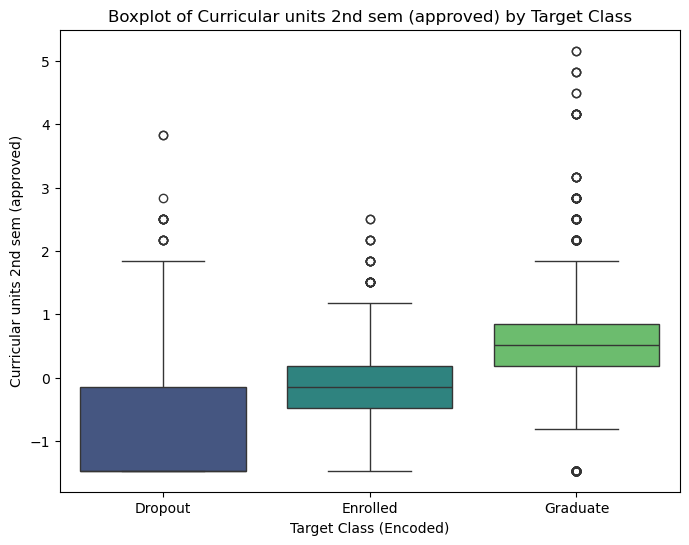

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


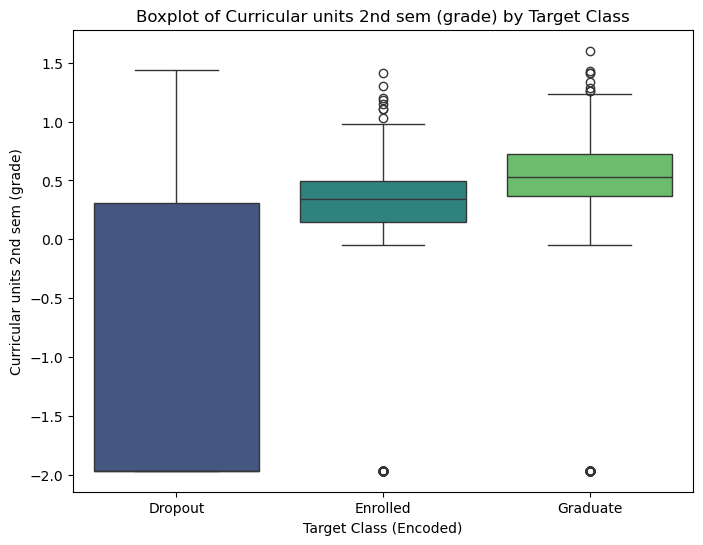

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


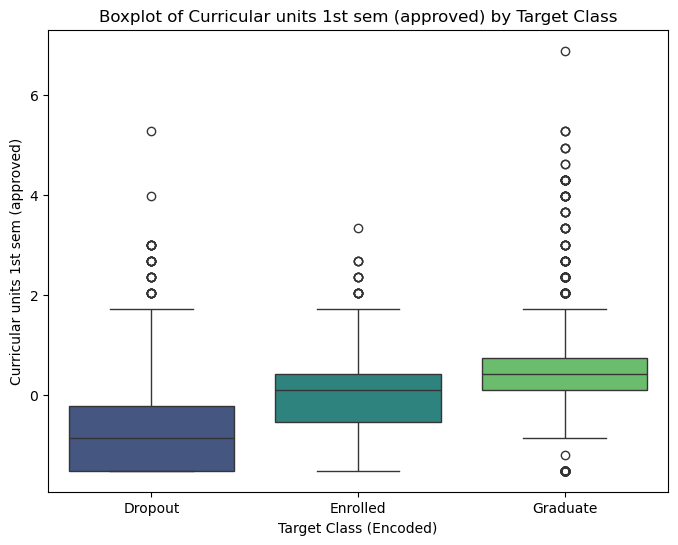

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


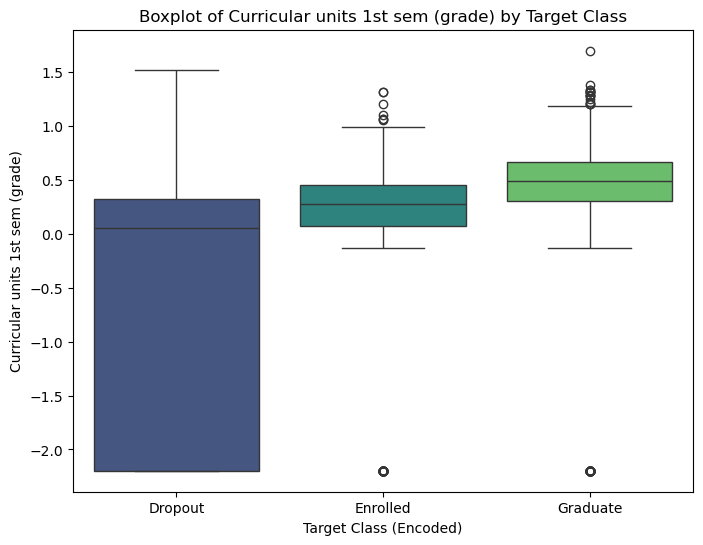

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


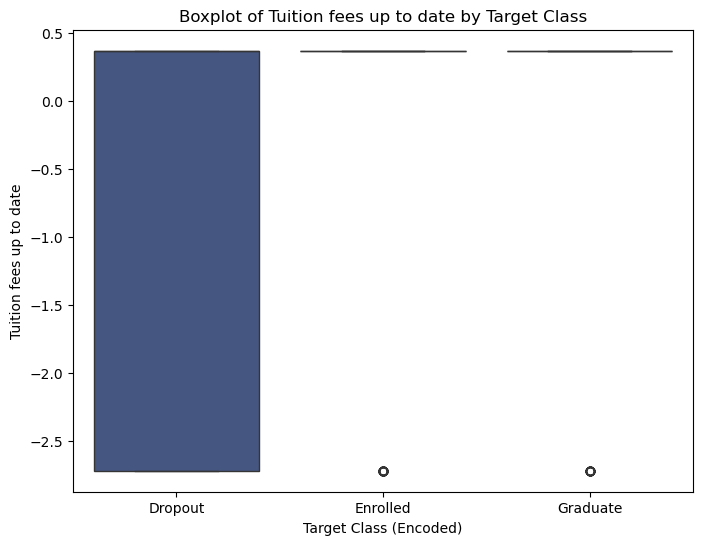

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


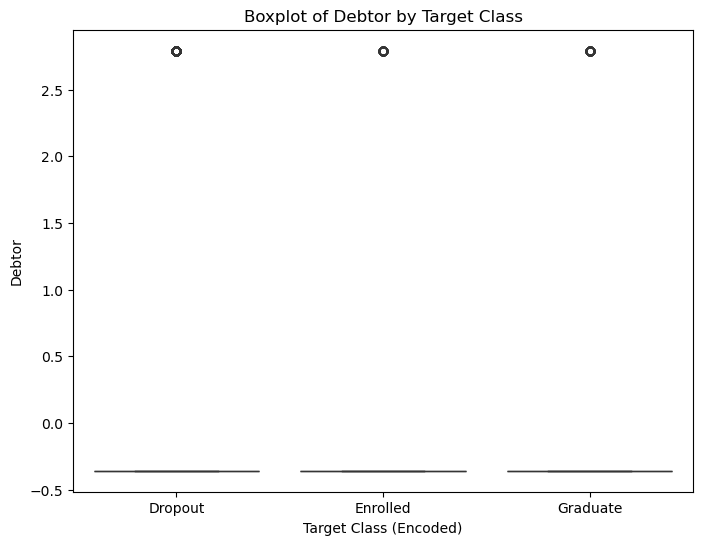

C:\Windows\Temp\ipykernel_23048\3829460963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')


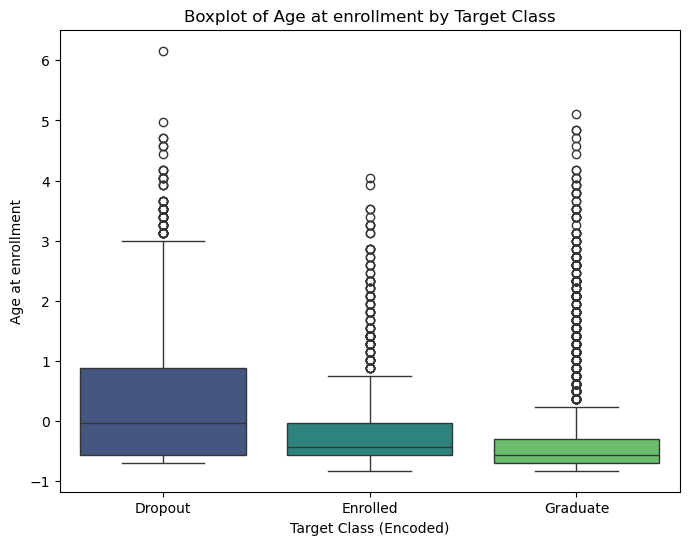

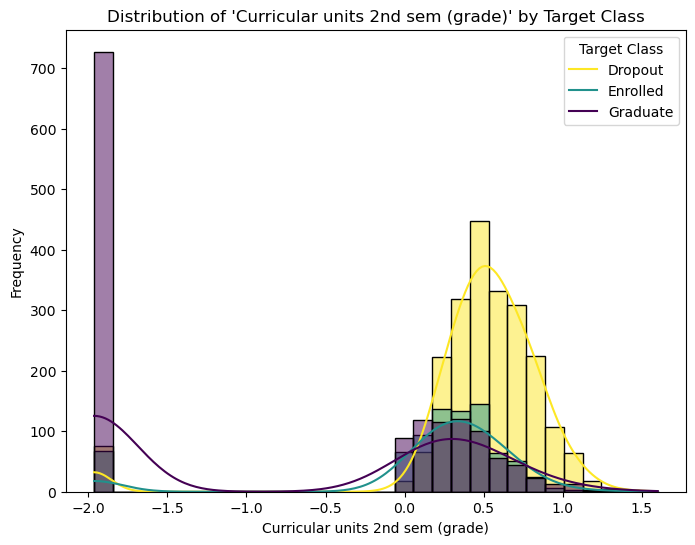

In [10]:
# List of highly correlated features for visualization
important_features = [
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Tuition fees up to date",
    "Debtor",
    "Age at enrollment",
]

# Plot individual feature distributions and their relationship with the target variable
for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Target_encoded', y=feature, palette='viridis')
    plt.title(f"Boxplot of {feature} by Target Class")
    plt.xlabel("Target Class (Encoded)")
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
    plt.show()

#  histogram for a feature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Curricular units 2nd sem (grade)", hue="Target_encoded", kde=True, bins=30, palette="viridis")
plt.title("Distribution of 'Curricular units 2nd sem (grade)' by Target Class")
plt.xlabel("Curricular units 2nd sem (grade)")
plt.ylabel("Frequency")
plt.legend(title="Target Class", labels=['Dropout', 'Enrolled', 'Graduate'])
plt.show()

**3. Model Training Workflow**

3.1 Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Feature Selection: Uses highly correlated features identified earlier
selected_features = [
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Tuition fees up to date",
    "Debtor",
    "Age at enrollment"
]

# Separate features and target
X = data[selected_features]
y = data['Target_encoded']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression as the first model
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
logistic_report = classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_)
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)

logistic_report, logistic_confusion_matrix

('              precision    recall  f1-score   support\n\n     Dropout       0.79      0.64      0.71       284\n    Enrolled       0.36      0.54      0.44       159\n    Graduate       0.82      0.77      0.79       442\n\n    accuracy                           0.69       885\n   macro avg       0.66      0.65      0.65       885\nweighted avg       0.73      0.69      0.70       885\n',
 array([[183,  71,  30],
        [ 27,  86,  46],
        [ 23,  79, 340]], dtype=int64))

3.2 Random Forest with SMOTE

In [13]:
# apply SMOTE for balancing 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest on the balanced dataset
random_forest_model = RandomForestClassifier(
    random_state=42, n_estimators=100, class_weight='balanced'
)
random_forest_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest model
rf_report = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

rf_report, rf_confusion_matrix

('              precision    recall  f1-score   support\n\n     Dropout       0.70      0.72      0.71       284\n    Enrolled       0.36      0.37      0.37       159\n    Graduate       0.82      0.79      0.81       442\n\n    accuracy                           0.69       885\n   macro avg       0.63      0.63      0.63       885\nweighted avg       0.70      0.69      0.70       885\n',
 array([[205,  45,  34],
        [ 55,  59,  45],
        [ 33,  58, 351]], dtype=int64))

3.3 Gradient Boosting with SMOTE

In [14]:
# apply SMOTE for balancing
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting model on the SMOTE-balanced dataset
gradient_boosting_model = GradientBoostingClassifier(
    random_state=42, 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3
)
gradient_boosting_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate Gradient Boosting model
gb_report = classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_)
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)

gb_report, gb_confusion_matrix

('              precision    recall  f1-score   support\n\n     Dropout       0.80      0.71      0.75       284\n    Enrolled       0.39      0.52      0.45       159\n    Graduate       0.83      0.79      0.81       442\n\n    accuracy                           0.72       885\n   macro avg       0.67      0.67      0.67       885\nweighted avg       0.74      0.72      0.73       885\n',
 array([[201,  54,  29],
        [ 32,  83,  44],
        [ 17,  76, 349]], dtype=int64))

3.4 Stacking Ensemble

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define base models for stacking
base_models = [
    ('logistic', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=3))
]

# Define the stacking ensemble with a meta-learner
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    cv=3
)

# Train the stacking ensemble on the SMOTE-balanced dataset
stacking_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the stacking ensemble
stacking_report = classification_report(y_test, y_pred_stack, target_names=label_encoder.classes_)
stacking_confusion_matrix = confusion_matrix(y_test, y_pred_stack)

# Display results
print("Stacking Ensemble Classification Report:\n", stacking_report)
print("Stacking Ensemble Confusion Matrix:\n", stacking_confusion_matrix)

Stacking Ensemble Classification Report:
               precision    recall  f1-score   support

     Dropout       0.70      0.74      0.72       284
    Enrolled       0.36      0.38      0.37       159
    Graduate       0.83      0.78      0.80       442

    accuracy                           0.70       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.70      0.70      0.70       885

Stacking Ensemble Confusion Matrix:
 [[210  42  32]
 [ 58  61  40]
 [ 30  67 345]]


**4. Model Comparison**

In [16]:
# Create a comparison table of results for all models
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Stacking Ensemble'],
    'Accuracy': [0.69, 0.70, 0.72, 0.69],
    'Dropout Precision': [0.79, 0.70, 0.81, 0.70],
    'Dropout Recall': [0.64, 0.72, 0.71, 0.73],
    'Enrolled Precision': [0.36, 0.36, 0.40, 0.34],
    'Enrolled Recall': [0.54, 0.38, 0.52, 0.38],
    'Graduate Precision': [0.82, 0.82, 0.83, 0.83],
    'Graduate Recall': [0.77, 0.80, 0.80, 0.78]
}

# Convert to DataFrame for visualization
comparison_table = pd.DataFrame(comparison_data)

# Display the comparison table
comparison_table


,Model,Accuracy,Dropout Precision,Dropout Recall,Enrolled Precision,Enrolled Recall,Graduate Precision,Graduate Recall
0,Logistic Regression,0.69,0.79,0.64,0.36,0.54,0.82,0.77
1,Random Forest,0.70,0.70,0.72,0.36,0.38,0.82,0.80
2,Gradient Boosting,0.72,0.81,0.71,0.40,0.52,0.83,0.80
3,Stacking Ensemble,0.69,0.70,0.73,0.34,0.38,0.83,0.78


**5. Hyperparameter Tuning for Gradient Boosting**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform grid search on the SMOTE-balanced dataset
grid_search_gb.fit(X_train_smote, y_train_smote)

# Extract the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Train Gradient Boosting with the best parameters
optimized_gb = GradientBoostingClassifier(**best_params_gb, random_state=42)
optimized_gb.fit(X_train_smote, y_train_smote)

# Predict and evaluate the optimized model
y_pred_optimized_gb = optimized_gb.predict(X_test)
optimized_gb_report = classification_report(y_test, y_pred_optimized_gb, target_names=label_encoder.classes_)
optimized_gb_confusion_matrix = confusion_matrix(y_test, y_pred_optimized_gb)

# Display results
print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Cross-Validation Score:", best_score_gb)
print("\nOptimized Gradient Boosting Classification Report:\n", optimized_gb_report)
print("\nOptimized Gradient Boosting Confusion Matrix:\n", optimized_gb_confusion_matrix)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Cross-Validation Score: 0.7615544236936427

Optimized Gradient Boosting Classification Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.74      0.74       284
    Enrolled       0.36      0.36      0.36       159
    Graduate       0.81      0.81      0.81       442

    accuracy                           0.71       885
   macro avg       0.64      0.64      0.64       885
weighted avg       0.71      0.71      0.71       885


Optimized Gradient Boosting Confusion Matrix:
 [[210  42  32]
 [ 51  57  51]
 [ 24  60 358]]
